In [1]:
# 🎯 Linear Regression: Teaching Computers to Draw Lines!

**Welcome, Young Data Scientist!**

Have you ever played "connect the dots"? Linear regression is kind of like that, but instead of connecting dots exactly, we're teaching a computer to draw the **best possible line** through a bunch of scattered dots!

---

## 📚 What You'll Learn in This Notebook

1. **What is Linear Regression?** - Understanding the basics
2. **Simple Linear Regression** - Drawing the best line through points
3. **Gradient Descent** - How computers learn to improve
4. **Polynomial Regression** - When lines aren't enough (curves!)
5. **Regularization** - Preventing our model from being too "creative"

---

## 🎨 Real-World Examples of Linear Regression

Linear regression helps us answer questions like:
- If I study more hours, will my test score go up?
- If a house is bigger, will it cost more?
- If I water my plant more, will it grow taller?

Let's dive in! 🚀

SyntaxError: unterminated string literal (detected at line 5) (2158908427.py, line 5)

---

# Part 1: Setting Up Our Workshop 🛠️

Before we start, we need to import some helpful tools (libraries). Think of these as our art supplies!

In [2]:
# First, let's import all the tools we need
# Don't worry if you don't understand all of these yet!

import numpy as np                    # For math operations (like a super calculator)
import pandas as pd                   # For organizing data (like a spreadsheet)
import matplotlib.pyplot as plt       # For drawing graphs (our art canvas)
from matplotlib.animation import FuncAnimation  # For animations
from IPython.display import HTML      # For showing animations in notebooks
import warnings
warnings.filterwarnings('ignore')     # Hide warning messages to keep things clean

# Make our graphs look nice and big
plt.style.use('seaborn-v0_8-whitegrid')
plt.rcParams['figure.figsize'] = [10, 6]
plt.rcParams['font.size'] = 12

# Set a random seed so everyone gets the same results
np.random.seed(42)

print("✅ All tools are ready! Let's learn about Linear Regression!")

✅ All tools are ready! Let's learn about Linear Regression!


---

# Part 2: What is Linear Regression? 🤔

## The Big Picture

Imagine you're trying to predict how tall a plant will grow based on how much water you give it. You've measured several plants and written down the results. Now you want to **find a pattern** so you can predict how tall a NEW plant will grow!

**Linear Regression** is a method that finds the **best straight line** through your data points.

## The Equation of a Line

Remember from math class? A line can be written as:

$$y = mx + b$$

Where:
- **y** = what we want to predict (like plant height)
- **x** = what we use to predict (like amount of water)
- **m** = the **slope** (how steep the line is)
- **b** = the **y-intercept** (where the line crosses the y-axis)

In machine learning, we usually write this as:

$$\hat{y} = w \cdot x + b$$

Where:
- **ŷ** (y-hat) = our **prediction**
- **w** = **weight** (same as slope)
- **b** = **bias** (same as y-intercept)

Let's visualize this!

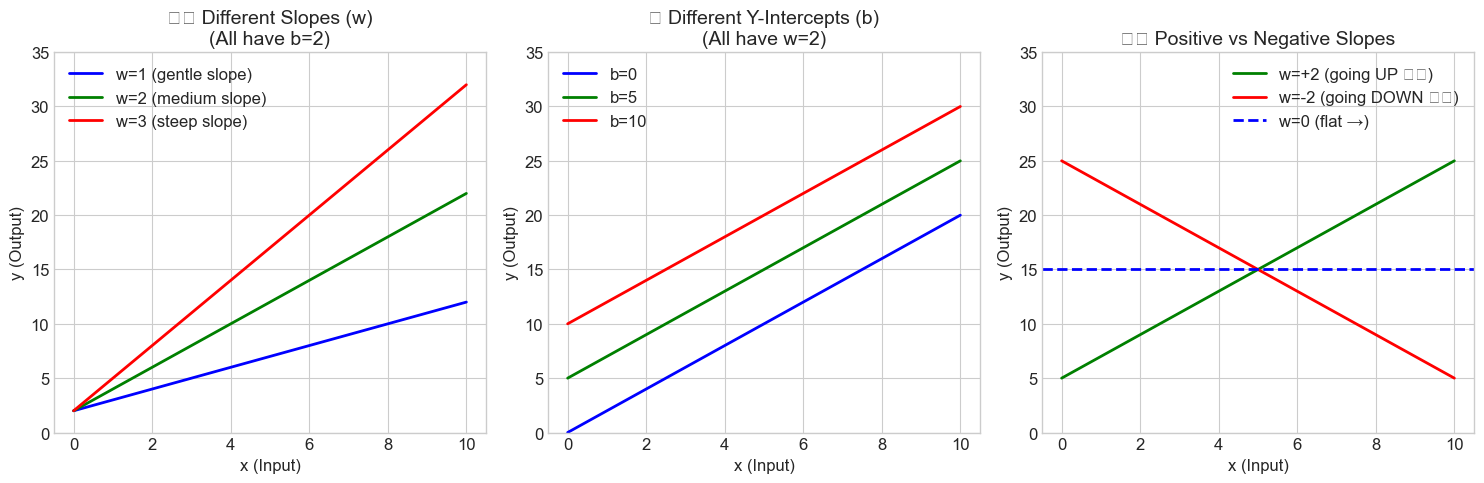


💡 KEY INSIGHT:
   • The SLOPE (w) controls how STEEP the line is
   • The INTERCEPT (b) controls WHERE the line starts on the y-axis
   • Linear Regression finds the BEST w and b for our data!


In [3]:
# Let's see what different lines look like!

# Create a figure with 3 subplots side by side
fig, axes = plt.subplots(1, 3, figsize=(15, 5))

# X values from 0 to 10
x = np.linspace(0, 10, 100)

# Plot 1: Different slopes (w values)
axes[0].plot(x, 1*x + 2, 'b-', linewidth=2, label='w=1 (gentle slope)')
axes[0].plot(x, 2*x + 2, 'g-', linewidth=2, label='w=2 (medium slope)')
axes[0].plot(x, 3*x + 2, 'r-', linewidth=2, label='w=3 (steep slope)')
axes[0].set_xlabel('x (Input)', fontsize=12)
axes[0].set_ylabel('y (Output)', fontsize=12)
axes[0].set_title('🏔️ Different Slopes (w)\n(All have b=2)', fontsize=14)
axes[0].legend()
axes[0].set_ylim(0, 35)

# Plot 2: Different y-intercepts (b values)
axes[1].plot(x, 2*x + 0, 'b-', linewidth=2, label='b=0')
axes[1].plot(x, 2*x + 5, 'g-', linewidth=2, label='b=5')
axes[1].plot(x, 2*x + 10, 'r-', linewidth=2, label='b=10')
axes[1].set_xlabel('x (Input)', fontsize=12)
axes[1].set_ylabel('y (Output)', fontsize=12)
axes[1].set_title('📍 Different Y-Intercepts (b)\n(All have w=2)', fontsize=14)
axes[1].legend()
axes[1].set_ylim(0, 35)

# Plot 3: Positive vs Negative slopes
axes[2].plot(x, 2*x + 5, 'g-', linewidth=2, label='w=+2 (going UP ↗️)')
axes[2].plot(x, -2*x + 25, 'r-', linewidth=2, label='w=-2 (going DOWN ↘️)')
axes[2].axhline(y=15, color='blue', linestyle='--', linewidth=2, label='w=0 (flat →)')
axes[2].set_xlabel('x (Input)', fontsize=12)
axes[2].set_ylabel('y (Output)', fontsize=12)
axes[2].set_title('↗️ Positive vs Negative Slopes', fontsize=14)
axes[2].legend()
axes[2].set_ylim(0, 35)

plt.tight_layout()
plt.savefig('01_understanding_lines.png', dpi=150, bbox_inches='tight')
plt.show()

print("\n💡 KEY INSIGHT:")
print("   • The SLOPE (w) controls how STEEP the line is")
print("   • The INTERCEPT (b) controls WHERE the line starts on the y-axis")
print("   • Linear Regression finds the BEST w and b for our data!")

---

# Part 3: Our First Dataset - Study Hours vs Test Scores 📝

Let's create a simple, relatable dataset: **How do study hours affect test scores?**

This is something every student can relate to!

In [4]:
# Let's create our dataset!
# We'll pretend we surveyed 30 students about their study habits

# Number of students in our survey
n_students = 30

# Study hours (randomly between 0.5 and 8 hours)
study_hours = np.random.uniform(0.5, 8, n_students)

# Test scores - generally, more study = higher score, but with some randomness
# True relationship: score = 40 + 7*hours (plus some random noise)
true_intercept = 40  # Base score even with minimal studying
true_slope = 7       # Each hour of studying adds ~7 points
noise = np.random.normal(0, 5, n_students)  # Random variation (life isn't perfect!)

test_scores = true_intercept + true_slope * study_hours + noise

# Make sure scores stay between 0 and 100
test_scores = np.clip(test_scores, 0, 100)

# Create a nice DataFrame (like a spreadsheet) to view our data
data = pd.DataFrame({
    'Student': [f'Student {i+1}' for i in range(n_students)],
    'Study_Hours': np.round(study_hours, 1),
    'Test_Score': np.round(test_scores, 1)
})

print("📊 Our Dataset: Study Hours vs Test Scores")
print("=" * 45)
print(data.head(10).to_string(index=False))
print(f"\n... and {n_students - 10} more students")
print(f"\n📈 Dataset Statistics:")
print(f"   • Average study hours: {study_hours.mean():.1f} hours")
print(f"   • Average test score: {test_scores.mean():.1f} points")

📊 Our Dataset: Study Hours vs Test Scores
   Student  Study_Hours  Test_Score
 Student 1          3.3        57.4
 Student 2          7.6        95.3
 Student 3          6.0        78.9
 Student 4          5.0        73.5
 Student 5          1.7        48.7
 Student 6          1.7        61.0
 Student 7          0.9        46.5
 Student 8          7.0        83.7
 Student 9          5.0        79.2
Student 10          5.8        74.6

... and 20 more students

📈 Dataset Statistics:
   • Average study hours: 3.8 hours
   • Average test score: 65.6 points


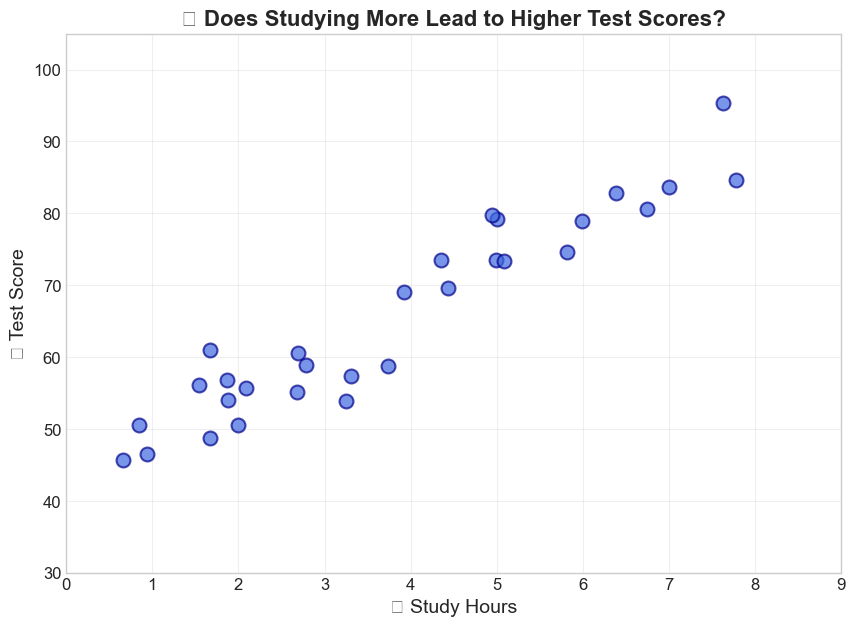


🔍 OBSERVATION:
   Can you see a pattern? It looks like students who study more
   tend to get higher scores! But the points don't form a perfect line.
   
   Our goal: Find the BEST line that represents this pattern!


In [5]:
# Let's visualize our data!

plt.figure(figsize=(10, 7))

# Plot each student as a dot
plt.scatter(study_hours, test_scores, 
            s=100,                    # Size of dots
            c='royalblue',           # Color
            alpha=0.7,               # Slight transparency
            edgecolors='darkblue',   # Edge color
            linewidth=1.5)

# Add labels
plt.xlabel('📚 Study Hours', fontsize=14)
plt.ylabel('📝 Test Score', fontsize=14)
plt.title('🎓 Does Studying More Lead to Higher Test Scores?', fontsize=16, fontweight='bold')

# Add a grid for easier reading
plt.grid(True, alpha=0.3)

# Set axis limits
plt.xlim(0, 9)
plt.ylim(30, 105)

plt.savefig('02_scatter_plot_data.png', dpi=150, bbox_inches='tight')
plt.show()

print("\n🔍 OBSERVATION:")
print("   Can you see a pattern? It looks like students who study more")
print("   tend to get higher scores! But the points don't form a perfect line.")
print("   \n   Our goal: Find the BEST line that represents this pattern!")

---

# Part 4: Finding the Best Line 🎯

## What Makes a Line "Good" or "Bad"?

To find the **best** line, we need a way to measure how **good** or **bad** a line is. We do this by looking at the **errors** (also called **residuals**).

**Error** = Actual Value - Predicted Value

The **best line** is the one that makes these errors as **small as possible**!

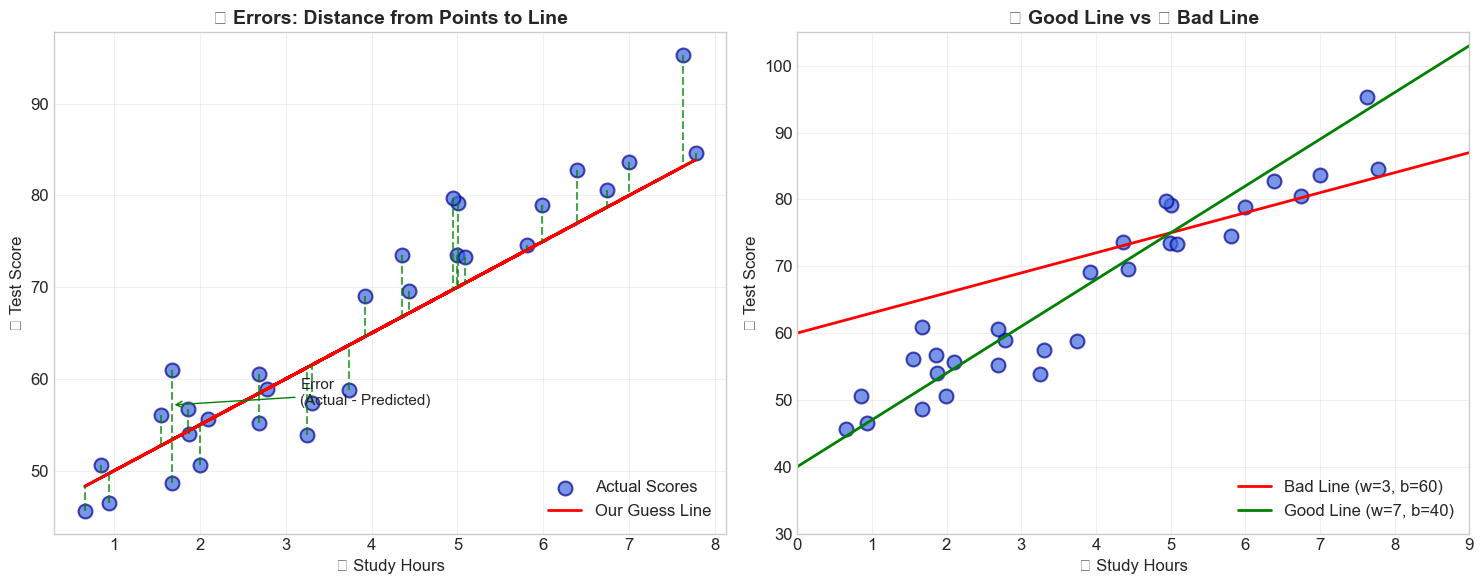


📊 ERROR COMPARISON:
   ❌ Bad Line  - Average Absolute Error: 7.81 points
   ✅ Good Line - Average Absolute Error: 3.80 points

   The GOOD line has SMALLER errors - that's what we want!


In [6]:
# Let's visualize what "errors" look like!

# We'll try a "guess" line and see the errors
guess_slope = 5      # Our guess for slope
guess_intercept = 45 # Our guess for intercept

# Calculate predictions using our guess
predictions = guess_slope * study_hours + guess_intercept

# Create the plot
fig, axes = plt.subplots(1, 2, figsize=(15, 6))

# Left plot: Show the errors as vertical lines
axes[0].scatter(study_hours, test_scores, s=100, c='royalblue', 
                alpha=0.7, edgecolors='darkblue', linewidth=1.5, label='Actual Scores')
axes[0].plot(study_hours, predictions, 'r-', linewidth=2, label='Our Guess Line')

# Draw error lines (from actual point to prediction on line)
for i in range(len(study_hours)):
    axes[0].plot([study_hours[i], study_hours[i]], 
                 [test_scores[i], predictions[i]], 
                 'g--', linewidth=1.5, alpha=0.7)

# Add a sample error annotation
idx = 5
axes[0].annotate('Error\n(Actual - Predicted)', 
                 xy=(study_hours[idx], (test_scores[idx] + predictions[idx])/2),
                 xytext=(study_hours[idx]+1.5, (test_scores[idx] + predictions[idx])/2),
                 fontsize=11, ha='left',
                 arrowprops=dict(arrowstyle='->', color='green'))

axes[0].set_xlabel('📚 Study Hours', fontsize=12)
axes[0].set_ylabel('📝 Test Score', fontsize=12)
axes[0].set_title('📏 Errors: Distance from Points to Line', fontsize=14, fontweight='bold')
axes[0].legend(loc='lower right')
axes[0].grid(True, alpha=0.3)

# Right plot: Good line vs Bad line comparison
bad_slope = 3
bad_intercept = 60
bad_predictions = bad_slope * study_hours + bad_intercept

good_slope = 7
good_intercept = 40
good_predictions = good_slope * study_hours + good_intercept

x_line = np.linspace(0, 9, 100)

axes[1].scatter(study_hours, test_scores, s=100, c='royalblue', 
                alpha=0.7, edgecolors='darkblue', linewidth=1.5)
axes[1].plot(x_line, bad_slope * x_line + bad_intercept, 'r-', 
             linewidth=2, label=f'Bad Line (w={bad_slope}, b={bad_intercept})')
axes[1].plot(x_line, good_slope * x_line + good_intercept, 'g-', 
             linewidth=2, label=f'Good Line (w={good_slope}, b={good_intercept})')

axes[1].set_xlabel('📚 Study Hours', fontsize=12)
axes[1].set_ylabel('📝 Test Score', fontsize=12)
axes[1].set_title('✅ Good Line vs ❌ Bad Line', fontsize=14, fontweight='bold')
axes[1].legend(loc='lower right')
axes[1].grid(True, alpha=0.3)
axes[1].set_xlim(0, 9)
axes[1].set_ylim(30, 105)

plt.tight_layout()
plt.savefig('03_errors_visualization.png', dpi=150, bbox_inches='tight')
plt.show()

# Calculate errors for comparison
bad_errors = test_scores - bad_predictions
good_errors = test_scores - good_predictions

print("\n📊 ERROR COMPARISON:")
print(f"   ❌ Bad Line  - Average Absolute Error: {np.mean(np.abs(bad_errors)):.2f} points")
print(f"   ✅ Good Line - Average Absolute Error: {np.mean(np.abs(good_errors)):.2f} points")
print("\n   The GOOD line has SMALLER errors - that's what we want!")

---

## The Cost Function (MSE) 📉

To measure how "bad" a line is, we use something called a **Cost Function** or **Loss Function**.

The most common one is **Mean Squared Error (MSE)**:

$$MSE = \frac{1}{n} \sum_{i=1}^{n} (y_i - \hat{y}_i)^2$$

In simple terms:
1. **Calculate each error**: (actual - predicted)
2. **Square each error**: This makes all errors positive and punishes big errors more
3. **Take the average**: Add them up and divide by the number of points

**Lower MSE = Better Line!** 🎯

In [7]:
def calculate_mse(y_actual, y_predicted):
    """
    Calculate Mean Squared Error (MSE)
    
    This function measures how "wrong" our predictions are.
    Lower MSE = Better predictions!
    
    Parameters:
    -----------
    y_actual : array of actual/true values
    y_predicted : array of our predictions
    
    Returns:
    --------
    MSE value (a single number)
    """
    # Step 1: Calculate errors (actual - predicted)
    errors = y_actual - y_predicted
    
    # Step 2: Square each error
    squared_errors = errors ** 2
    
    # Step 3: Calculate the mean (average)
    mse = np.mean(squared_errors)
    
    return mse


def predict(x, w, b):
    """
    Make predictions using our line equation: y = wx + b
    
    Parameters:
    -----------
    x : input values (study hours)
    w : weight (slope)
    b : bias (y-intercept)
    
    Returns:
    --------
    Predicted values
    """
    return w * x + b


# Let's test different lines and see their MSE!
test_lines = [
    (3, 60, 'Bad Line 1'),
    (5, 50, 'Medium Line'),
    (7, 40, 'Good Line'),
    (true_slope, true_intercept, 'True Line (what we want to find)')
]

print("🔬 COMPARING DIFFERENT LINES:")
print("=" * 55)
print(f"{'Line':<35} {'w':>5} {'b':>5} {'MSE':>10}")
print("-" * 55)

for w, b, name in test_lines:
    preds = predict(study_hours, w, b)
    mse = calculate_mse(test_scores, preds)
    print(f"{name:<35} {w:>5} {b:>5} {mse:>10.2f}")

print("\n💡 Notice: The line closer to the TRUE values has LOWER MSE!")

🔬 COMPARING DIFFERENT LINES:
Line                                    w     b        MSE
-------------------------------------------------------
Bad Line 1                              3    60      90.79
Medium Line                             5    50      32.87
Good Line                               7    40      21.36
True Line (what we want to find)        7    40      21.36

💡 Notice: The line closer to the TRUE values has LOWER MSE!


---

# Part 5: Gradient Descent - Teaching the Computer to Learn! 🧠

Now comes the exciting part! **Gradient Descent** is how the computer **learns** to find the best line.

## The Mountain Analogy 🏔️

Imagine you're lost on a mountain and want to get to the bottom (lowest point). It's foggy, so you can't see far. What would you do?

**Strategy**: Feel which direction goes DOWN, then take a step that way. Repeat!

That's exactly what gradient descent does:
1. **Start somewhere** (with random w and b values)
2. **Figure out which direction reduces the error** (calculate the gradient)
3. **Take a small step in that direction** (update w and b)
4. **Repeat** until we reach the bottom (minimum error)!

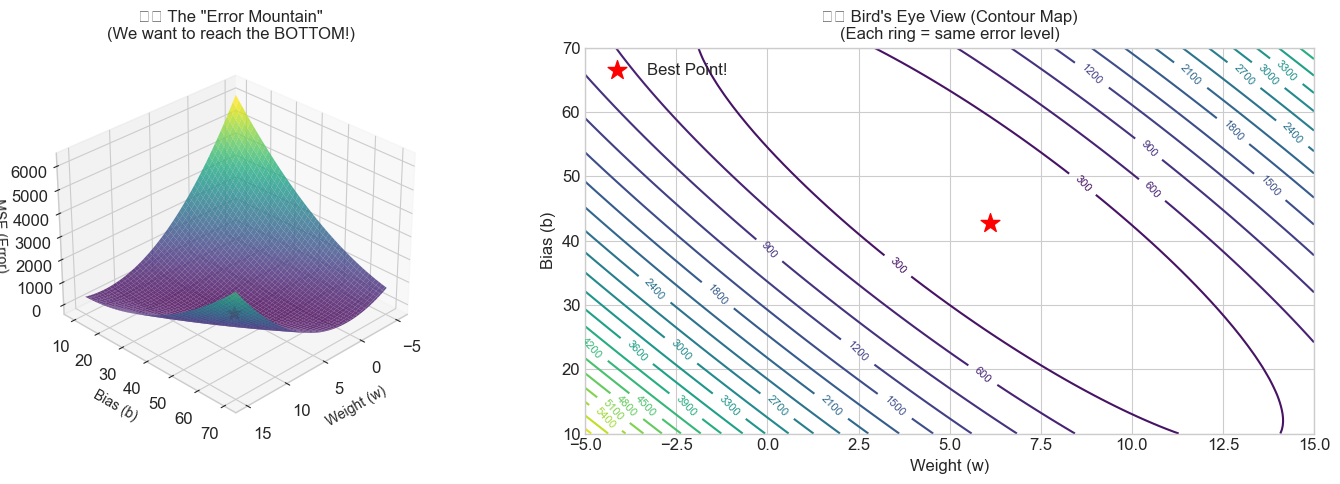


🎯 The BEST point we found:
   w = 6.11 (True: 7)
   b = 42.73 (True: 40)

   Gradient Descent helps us find this point automatically!


In [8]:
# Let's visualize the "mountain" of errors!
# We'll show how MSE changes with different w and b values

# Create a grid of w and b values to test
w_values = np.linspace(-5, 15, 100)  # Test slopes from -5 to 15
b_values = np.linspace(10, 70, 100)  # Test intercepts from 10 to 70

# Calculate MSE for each combination of w and b
W, B = np.meshgrid(w_values, b_values)
MSE_grid = np.zeros_like(W)

for i in range(len(b_values)):
    for j in range(len(w_values)):
        preds = predict(study_hours, W[i, j], B[i, j])
        MSE_grid[i, j] = calculate_mse(test_scores, preds)

# Create the visualization
fig = plt.figure(figsize=(15, 5))

# Left plot: 3D surface (the "mountain")
ax1 = fig.add_subplot(121, projection='3d')
surf = ax1.plot_surface(W, B, MSE_grid, cmap='viridis', alpha=0.8)
ax1.set_xlabel('Weight (w)', fontsize=10)
ax1.set_ylabel('Bias (b)', fontsize=10)
ax1.set_zlabel('MSE (Error)', fontsize=10)
ax1.set_title('🏔️ The "Error Mountain"\n(We want to reach the BOTTOM!)', fontsize=12)
ax1.view_init(elev=30, azim=45)

# Mark the minimum point
min_idx = np.unravel_index(np.argmin(MSE_grid), MSE_grid.shape)
ax1.scatter([W[min_idx]], [B[min_idx]], [MSE_grid[min_idx]], 
            color='red', s=100, marker='*', label='Best Point!')

# Right plot: Contour map (bird's eye view)
ax2 = fig.add_subplot(122)
contour = ax2.contour(W, B, MSE_grid, levels=20, cmap='viridis')
ax2.clabel(contour, inline=True, fontsize=8)
ax2.scatter([W[min_idx]], [B[min_idx]], color='red', s=200, marker='*', 
            label='Best Point!', zorder=5)
ax2.set_xlabel('Weight (w)', fontsize=12)
ax2.set_ylabel('Bias (b)', fontsize=12)
ax2.set_title('🗺️ Bird\'s Eye View (Contour Map)\n(Each ring = same error level)', fontsize=12)
ax2.legend()

plt.tight_layout()
plt.savefig('04_error_landscape.png', dpi=150, bbox_inches='tight')
plt.show()

print(f"\n🎯 The BEST point we found:")
print(f"   w = {W[min_idx]:.2f} (True: {true_slope})")
print(f"   b = {B[min_idx]:.2f} (True: {true_intercept})")
print(f"\n   Gradient Descent helps us find this point automatically!")

---

## The Math Behind Gradient Descent 📐

The **gradient** tells us which direction is "downhill" (reduces error).

For our line equation $\hat{y} = wx + b$, the gradients are:

$$\frac{\partial MSE}{\partial w} = -\frac{2}{n} \sum_{i=1}^{n} x_i \cdot (y_i - \hat{y}_i)$$

$$\frac{\partial MSE}{\partial b} = -\frac{2}{n} \sum_{i=1}^{n} (y_i - \hat{y}_i)$$

Don't worry if the math looks scary! The key idea is:
- **Positive gradient** → Go DOWN (decrease the value)
- **Negative gradient** → Go UP (increase the value)

We update our values using:
$$w_{new} = w_{old} - \alpha \cdot \frac{\partial MSE}{\partial w}$$
$$b_{new} = b_{old} - \alpha \cdot \frac{\partial MSE}{\partial b}$$

Where **α (alpha)** is the **learning rate** - how big of a step we take.

In [9]:
def gradient_descent(x, y, learning_rate=0.01, n_iterations=1000, verbose=True):
    """
    Perform Gradient Descent to find the best line!
    
    This function teaches the computer to find the best w and b values
    by repeatedly taking small steps toward lower error.
    
    Parameters:
    -----------
    x : input values (study hours)
    y : actual values (test scores)
    learning_rate : how big of a step to take (α)
    n_iterations : how many times to update
    verbose : whether to print progress
    
    Returns:
    --------
    w, b : the best weight and bias we found
    history : record of all w, b, and MSE values during training
    """
    n = len(x)  # Number of data points
    
    # Step 1: Start with random values (or zeros)
    w = 0  # Initial weight
    b = 0  # Initial bias
    
    # Keep track of our journey
    history = {'w': [w], 'b': [b], 'mse': []}
    
    # Calculate initial MSE
    predictions = predict(x, w, b)
    initial_mse = calculate_mse(y, predictions)
    history['mse'].append(initial_mse)
    
    if verbose:
        print("🚀 Starting Gradient Descent!")
        print(f"   Initial: w={w:.4f}, b={b:.4f}, MSE={initial_mse:.2f}")
        print("\n   Training...")
    
    # Step 2: Repeat many times
    for iteration in range(n_iterations):
        # Make predictions with current w and b
        predictions = predict(x, w, b)
        
        # Calculate errors
        errors = y - predictions
        
        # Calculate gradients (which direction to go)
        gradient_w = -(2/n) * np.sum(x * errors)  # How to change w
        gradient_b = -(2/n) * np.sum(errors)      # How to change b
        
        # Update w and b (take a step downhill)
        w = w - learning_rate * gradient_w
        b = b - learning_rate * gradient_b
        
        # Calculate new MSE
        new_predictions = predict(x, w, b)
        mse = calculate_mse(y, new_predictions)
        
        # Save to history
        history['w'].append(w)
        history['b'].append(b)
        history['mse'].append(mse)
        
        # Print progress at certain points
        if verbose and (iteration + 1) in [1, 10, 50, 100, 500, n_iterations]:
            print(f"   Iteration {iteration+1:>4}: w={w:.4f}, b={b:.4f}, MSE={mse:.2f}")
    
    if verbose:
        print(f"\n✅ Training Complete!")
        print(f"   Final: w={w:.4f}, b={b:.4f}, MSE={mse:.2f}")
    
    return w, b, history


# Run gradient descent on our data!
learned_w, learned_b, history = gradient_descent(
    study_hours, 
    test_scores, 
    learning_rate=0.01, 
    n_iterations=1000
)

🚀 Starting Gradient Descent!
   Initial: w=0.0000, b=0.0000, MSE=4482.13

   Training...
   Iteration    1: w=5.4996, b=1.3123, MSE=1907.26
   Iteration   10: w=13.7557, b=4.6274, MSE=351.40
   Iteration   50: w=12.5847, b=10.8555, MSE=250.77
   Iteration  100: w=11.2818, b=17.2073, MSE=166.53
   Iteration  500: w=6.9452, b=38.3489, MSE=21.00
   Iteration 1000: w=6.1651, b=42.1520, MSE=16.84

✅ Training Complete!
   Final: w=6.1651, b=42.1520, MSE=16.84


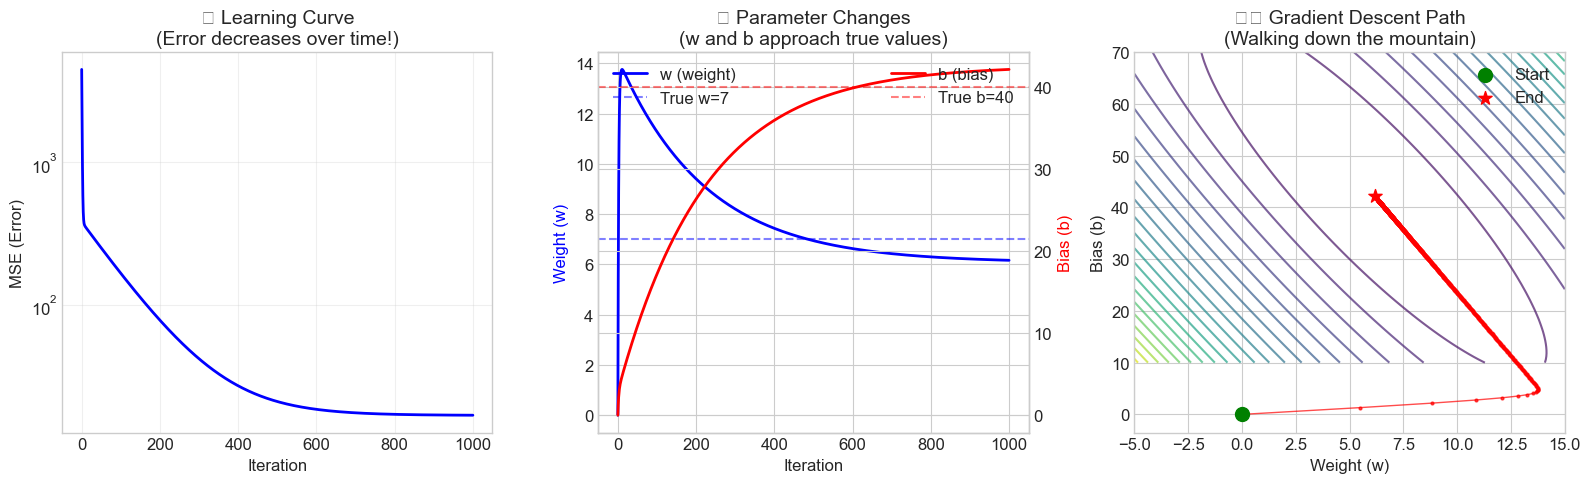


🎉 Gradient Descent found values very close to the TRUE values!
   Learned w = 6.1651 (True: 7)
   Learned b = 42.1520 (True: 40)


In [10]:
# Let's visualize how gradient descent learned over time!

fig, axes = plt.subplots(1, 3, figsize=(16, 5))

# Plot 1: MSE over iterations (the learning curve)
axes[0].plot(history['mse'], 'b-', linewidth=2)
axes[0].set_xlabel('Iteration', fontsize=12)
axes[0].set_ylabel('MSE (Error)', fontsize=12)
axes[0].set_title('📉 Learning Curve\n(Error decreases over time!)', fontsize=14)
axes[0].set_yscale('log')  # Log scale to see the descent better
axes[0].grid(True, alpha=0.3)

# Plot 2: How w and b changed
ax2_twin = axes[1].twinx()
line1 = axes[1].plot(history['w'], 'b-', linewidth=2, label='w (weight)')
line2 = ax2_twin.plot(history['b'], 'r-', linewidth=2, label='b (bias)')
axes[1].axhline(y=true_slope, color='blue', linestyle='--', alpha=0.5, label=f'True w={true_slope}')
ax2_twin.axhline(y=true_intercept, color='red', linestyle='--', alpha=0.5, label=f'True b={true_intercept}')
axes[1].set_xlabel('Iteration', fontsize=12)
axes[1].set_ylabel('Weight (w)', fontsize=12, color='blue')
ax2_twin.set_ylabel('Bias (b)', fontsize=12, color='red')
axes[1].set_title('📈 Parameter Changes\n(w and b approach true values)', fontsize=14)
axes[1].legend(loc='upper left')
ax2_twin.legend(loc='upper right')

# Plot 3: The journey on the contour map
contour = axes[2].contour(W, B, MSE_grid, levels=20, cmap='viridis', alpha=0.7)
axes[2].plot(history['w'], history['b'], 'ro-', markersize=2, linewidth=1, alpha=0.7)
axes[2].scatter([history['w'][0]], [history['b'][0]], color='green', s=100, 
                marker='o', label='Start', zorder=5)
axes[2].scatter([history['w'][-1]], [history['b'][-1]], color='red', s=100, 
                marker='*', label='End', zorder=5)
axes[2].set_xlabel('Weight (w)', fontsize=12)
axes[2].set_ylabel('Bias (b)', fontsize=12)
axes[2].set_title('🗺️ Gradient Descent Path\n(Walking down the mountain)', fontsize=14)
axes[2].legend()

plt.tight_layout()
plt.savefig('05_gradient_descent_progress.png', dpi=150, bbox_inches='tight')
plt.show()

print("\n🎉 Gradient Descent found values very close to the TRUE values!")
print(f"   Learned w = {learned_w:.4f} (True: {true_slope})")
print(f"   Learned b = {learned_b:.4f} (True: {true_intercept})")

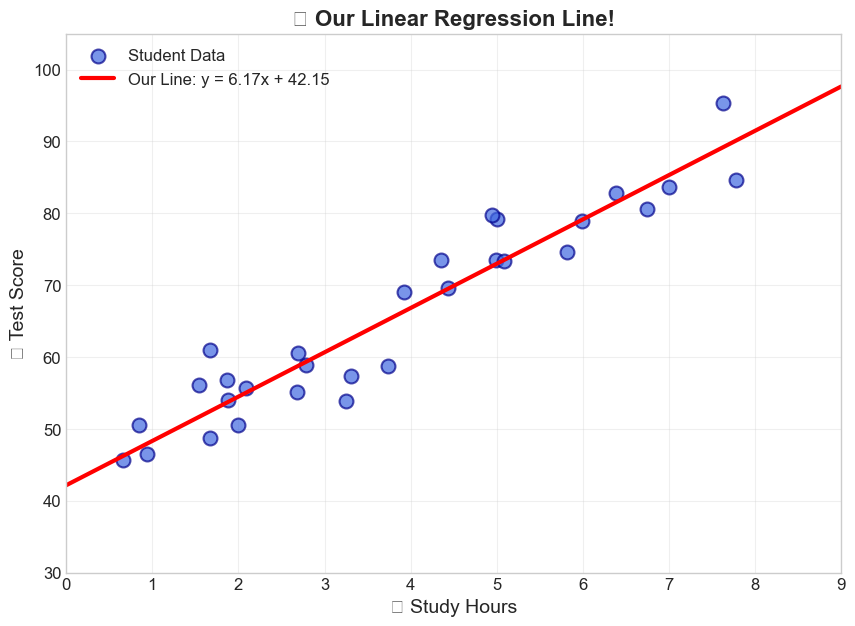


🔮 Now we can make PREDICTIONS!

   Example: If a student studies for 5 hours...
   Predicted score = 6.17 × 5 + 42.15 = 73.0 points!


In [11]:
# Now let's see our learned line on the data!

plt.figure(figsize=(10, 7))

# Plot the data points
plt.scatter(study_hours, test_scores, s=100, c='royalblue', 
            alpha=0.7, edgecolors='darkblue', linewidth=1.5, 
            label='Student Data')

# Plot our learned line
x_line = np.linspace(0, 9, 100)
y_line = learned_w * x_line + learned_b
plt.plot(x_line, y_line, 'r-', linewidth=3, 
         label=f'Our Line: y = {learned_w:.2f}x + {learned_b:.2f}')

# Add labels
plt.xlabel('📚 Study Hours', fontsize=14)
plt.ylabel('📝 Test Score', fontsize=14)
plt.title('🎓 Our Linear Regression Line!', fontsize=16, fontweight='bold')
plt.legend(fontsize=12)
plt.grid(True, alpha=0.3)
plt.xlim(0, 9)
plt.ylim(30, 105)

plt.savefig('06_final_regression_line.png', dpi=150, bbox_inches='tight')
plt.show()

print("\n🔮 Now we can make PREDICTIONS!")
print("\n   Example: If a student studies for 5 hours...")
prediction = learned_w * 5 + learned_b
print(f"   Predicted score = {learned_w:.2f} × 5 + {learned_b:.2f} = {prediction:.1f} points!")

---

# Part 6: Learning Rate - The Step Size 👣

The **learning rate (α)** controls how big of a step we take during gradient descent.

- **Too small**: Learning is very slow (takes forever!)
- **Too big**: We might overshoot and miss the best point!
- **Just right**: We find the answer efficiently

It's like Goldilocks - we need to find the one that's "just right"!

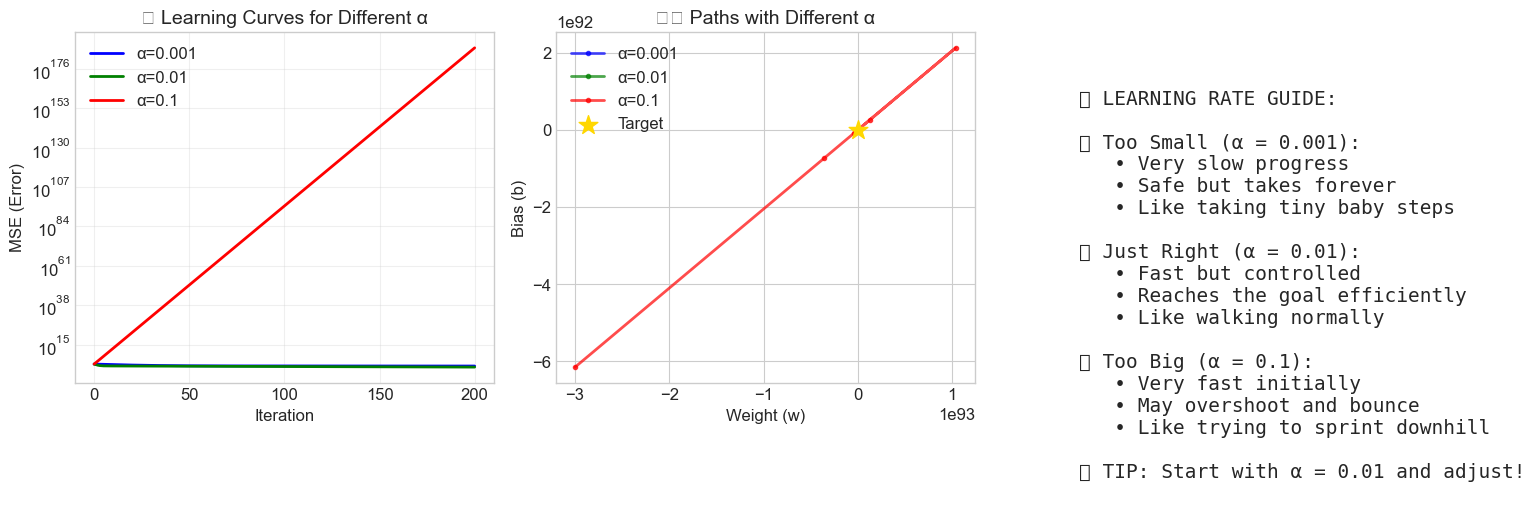

In [12]:
# Let's see how different learning rates affect training!

learning_rates = [0.001, 0.01, 0.1]
colors = ['blue', 'green', 'red']
labels = ['Too Small (0.001)', 'Just Right (0.01)', 'Too Big (0.1)']

fig, axes = plt.subplots(1, 3, figsize=(16, 5))

for i, (lr, color, label) in enumerate(zip(learning_rates, colors, labels)):
    _, _, hist = gradient_descent(study_hours, test_scores, 
                                  learning_rate=lr, n_iterations=200, verbose=False)
    
    # Learning curve
    axes[0].plot(hist['mse'], color=color, linewidth=2, label=f'α={lr}')
    
    # Path on contour
    axes[1].contour(W, B, MSE_grid, levels=15, cmap='Greys', alpha=0.5)
    axes[1].plot(hist['w'], hist['b'], color=color, linewidth=2, 
                 marker='o', markersize=3, label=f'α={lr}', alpha=0.7)

# Plot 1: Learning curves
axes[0].set_xlabel('Iteration', fontsize=12)
axes[0].set_ylabel('MSE (Error)', fontsize=12)
axes[0].set_title('📉 Learning Curves for Different α', fontsize=14)
axes[0].legend()
axes[0].set_yscale('log')
axes[0].grid(True, alpha=0.3)

# Plot 2: Paths
axes[1].scatter([true_slope], [true_intercept], color='gold', s=200, 
                marker='*', label='Target', zorder=10)
axes[1].set_xlabel('Weight (w)', fontsize=12)
axes[1].set_ylabel('Bias (b)', fontsize=12)
axes[1].set_title('🗺️ Paths with Different α', fontsize=14)
axes[1].legend()

# Plot 3: Visual explanation
axes[2].axis('off')
explanation = """
🎯 LEARNING RATE GUIDE:

🐢 Too Small (α = 0.001):
   • Very slow progress
   • Safe but takes forever
   • Like taking tiny baby steps

✅ Just Right (α = 0.01):
   • Fast but controlled
   • Reaches the goal efficiently
   • Like walking normally

🏃 Too Big (α = 0.1):
   • Very fast initially
   • May overshoot and bounce
   • Like trying to sprint downhill

💡 TIP: Start with α = 0.01 and adjust!
"""
axes[2].text(0.1, 0.9, explanation, fontsize=14, verticalalignment='top',
             fontfamily='monospace', transform=axes[2].transAxes)

plt.tight_layout()
plt.savefig('07_learning_rate_comparison.png', dpi=150, bbox_inches='tight')
plt.show()

---

# Part 7: Polynomial Regression - When Lines Aren't Enough! 🌊

Sometimes data doesn't follow a straight line. In these cases, we need **curves**!

**Polynomial Regression** lets us fit curves instead of lines by using powers of x:

- **Linear (degree 1)**: $y = w_1 x + b$
- **Quadratic (degree 2)**: $y = w_2 x^2 + w_1 x + b$
- **Cubic (degree 3)**: $y = w_3 x^3 + w_2 x^2 + w_1 x + b$

Let's see this with a new example!

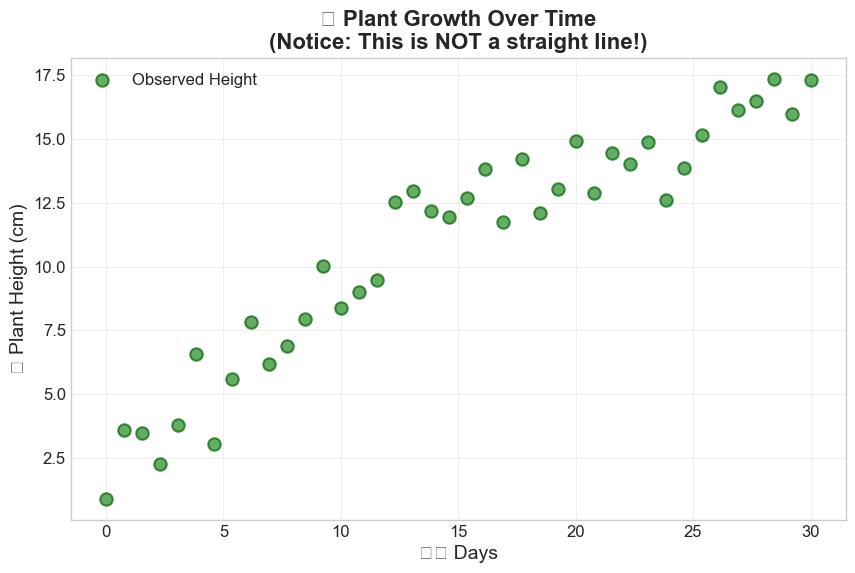


🔍 OBSERVATION:
   This data clearly follows a CURVE, not a straight line!
   A regular line would not fit well here.


In [13]:
# Let's create data that follows a curve!
# Example: Plant growth - grows fast at first, then slows down

np.random.seed(123)

# Days of observation
days = np.linspace(0, 30, 40)

# Plant height follows a logarithmic/polynomial pattern
# Height = -0.01*days^2 + 0.8*days + 2 (with noise)
true_height = -0.01 * days**2 + 0.8 * days + 2
noise = np.random.normal(0, 1, len(days))
plant_height = true_height + noise

# Make sure heights are positive
plant_height = np.maximum(plant_height, 0)

# Visualize this data
plt.figure(figsize=(10, 6))
plt.scatter(days, plant_height, s=80, c='forestgreen', alpha=0.7, 
            edgecolors='darkgreen', linewidth=1.5, label='Observed Height')
plt.xlabel('🗓️ Days', fontsize=14)
plt.ylabel('🌱 Plant Height (cm)', fontsize=14)
plt.title('🌻 Plant Growth Over Time\n(Notice: This is NOT a straight line!)', 
          fontsize=16, fontweight='bold')
plt.grid(True, alpha=0.3)
plt.legend()

plt.savefig('08_polynomial_data.png', dpi=150, bbox_inches='tight')
plt.show()

print("\n🔍 OBSERVATION:")
print("   This data clearly follows a CURVE, not a straight line!")
print("   A regular line would not fit well here.")

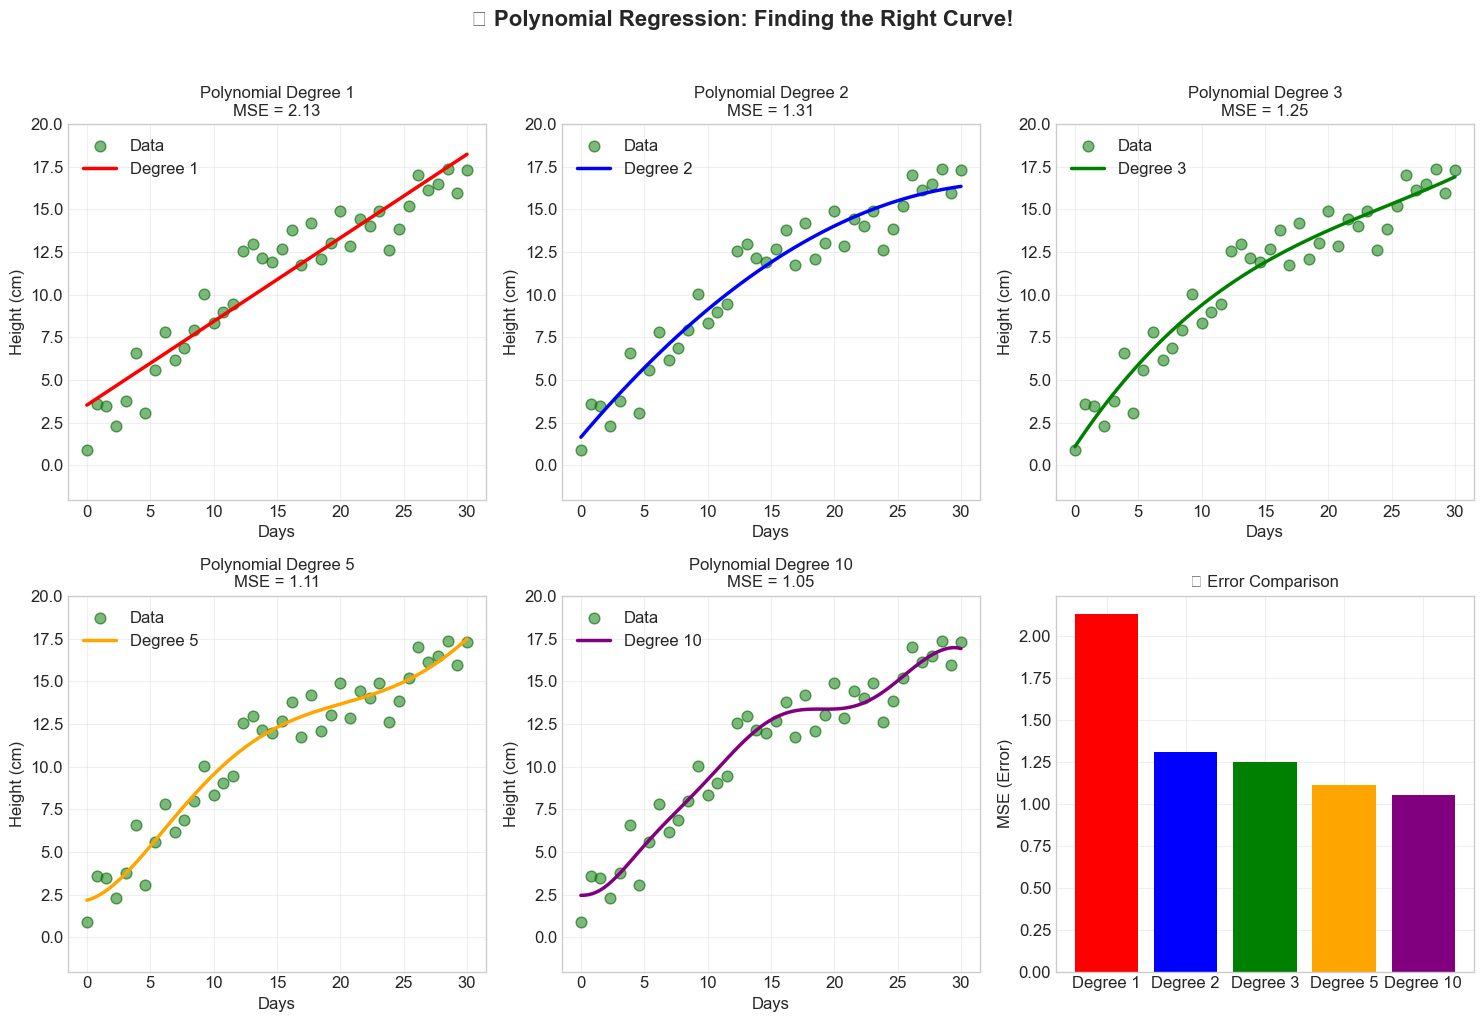


📊 OBSERVATIONS:
   • Degree 1 (straight line): Doesn't capture the curve at all!
   • Degree 2 (quadratic): Fits nicely! Captures the growth pattern.
   • Degree 3-5: Similar to degree 2, slightly better fit.
   • Degree 10: Fits training data VERY well, but...

⚠️  WARNING: Higher degree isn't always better! See Part 8.


In [14]:
# Let's compare different polynomial degrees!

from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression

# Prepare our data
X = days.reshape(-1, 1)  # Reshape for sklearn
y = plant_height

# Test different polynomial degrees
degrees = [1, 2, 3, 5, 10]
colors = ['red', 'blue', 'green', 'orange', 'purple']

fig, axes = plt.subplots(2, 3, figsize=(15, 10))
axes = axes.flatten()

# Store MSE values for comparison
mse_values = []

for idx, (degree, color) in enumerate(zip(degrees, colors)):
    # Create polynomial features
    poly = PolynomialFeatures(degree=degree)
    X_poly = poly.fit_transform(X)
    
    # Fit the model
    model = LinearRegression()
    model.fit(X_poly, y)
    
    # Make predictions
    X_line = np.linspace(0, 30, 100).reshape(-1, 1)
    X_line_poly = poly.transform(X_line)
    y_pred = model.predict(X_line_poly)
    
    # Calculate MSE
    y_train_pred = model.predict(X_poly)
    mse = calculate_mse(y, y_train_pred)
    mse_values.append(mse)
    
    # Plot
    axes[idx].scatter(days, plant_height, s=60, c='forestgreen', alpha=0.6, 
                      edgecolors='darkgreen', label='Data')
    axes[idx].plot(X_line, y_pred, color=color, linewidth=2.5, 
                   label=f'Degree {degree}')
    axes[idx].set_xlabel('Days')
    axes[idx].set_ylabel('Height (cm)')
    axes[idx].set_title(f'Polynomial Degree {degree}\nMSE = {mse:.2f}', fontsize=12)
    axes[idx].legend()
    axes[idx].set_ylim(-2, 20)
    axes[idx].grid(True, alpha=0.3)

# Last plot: MSE comparison
axes[5].bar(range(len(degrees)), mse_values, color=colors)
axes[5].set_xticks(range(len(degrees)))
axes[5].set_xticklabels([f'Degree {d}' for d in degrees])
axes[5].set_ylabel('MSE (Error)')
axes[5].set_title('📊 Error Comparison', fontsize=12)
axes[5].grid(True, alpha=0.3)

plt.suptitle('🔮 Polynomial Regression: Finding the Right Curve!', 
             fontsize=16, fontweight='bold', y=1.02)
plt.tight_layout()
plt.savefig('09_polynomial_comparison.png', dpi=150, bbox_inches='tight')
plt.show()

print("\n📊 OBSERVATIONS:")
print("   • Degree 1 (straight line): Doesn't capture the curve at all!")
print("   • Degree 2 (quadratic): Fits nicely! Captures the growth pattern.")
print("   • Degree 3-5: Similar to degree 2, slightly better fit.")
print("   • Degree 10: Fits training data VERY well, but...")
print("\n⚠️  WARNING: Higher degree isn't always better! See Part 8.")

---

# Part 8: Overfitting - When Models Get TOO Creative! 🎨

**Overfitting** happens when our model learns the training data TOO well, including the noise!

It's like memorizing answers instead of learning the concept - you'll do great on the practice test, but fail the real exam!

Let's see what happens when we use a very high polynomial degree:

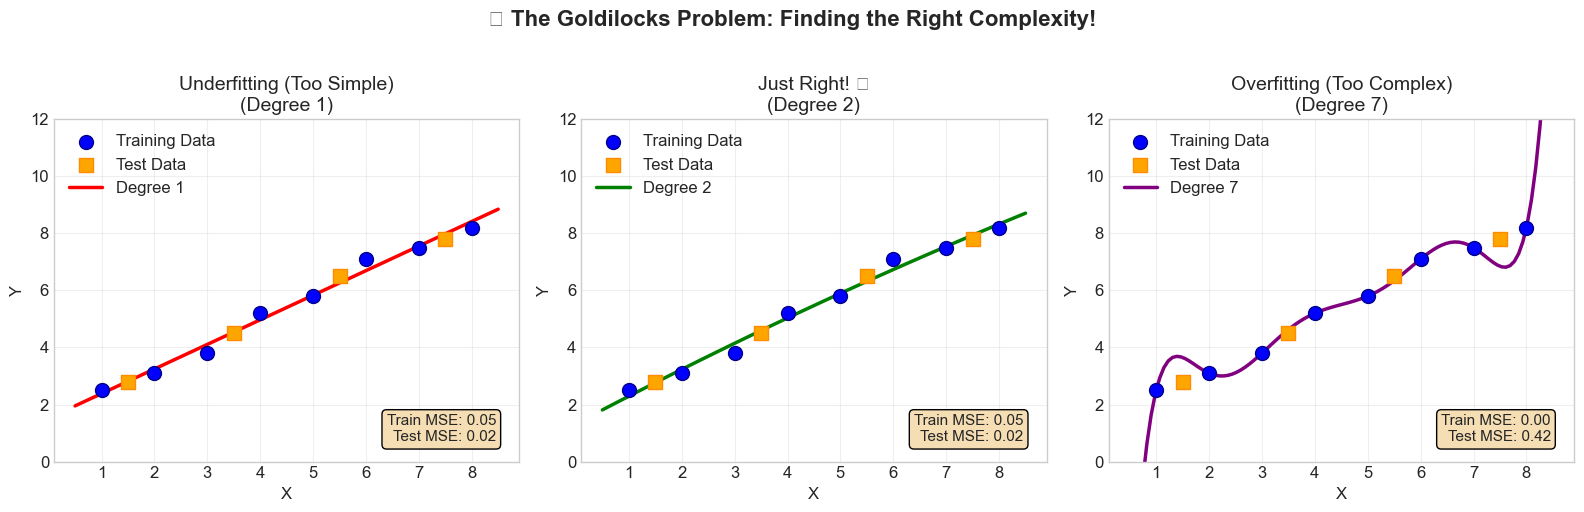


🔍 KEY OBSERVATIONS:

   📈 UNDERFITTING (Degree 1):
      • Too simple - can't capture the pattern
      • High error on BOTH training and test data

   ✅ JUST RIGHT (Degree 2):
      • Captures the general pattern
      • Good performance on BOTH training and test data

   🌀 OVERFITTING (Degree 7):
      • Memorizes training data (low training error)
      • Fails on new data (high test error)
      • Creates crazy wiggles that don't make sense!


In [15]:
# Demonstrate overfitting with a dramatic example
np.random.seed(42)

# Create simple training data (fewer points makes overfitting more obvious)
X_train = np.array([1, 2, 3, 4, 5, 6, 7, 8]).reshape(-1, 1)
y_train = np.array([2.5, 3.1, 3.8, 5.2, 5.8, 7.1, 7.5, 8.2])

# Create test data (new data the model hasn't seen)
X_test = np.array([1.5, 3.5, 5.5, 7.5]).reshape(-1, 1)
y_test = np.array([2.8, 4.5, 6.5, 7.8])

fig, axes = plt.subplots(1, 3, figsize=(16, 5))
X_line = np.linspace(0.5, 8.5, 100).reshape(-1, 1)

scenarios = [
    (1, 'Underfitting (Too Simple)', 'red'),
    (2, 'Just Right! ✅', 'green'),
    (7, 'Overfitting (Too Complex)', 'purple')
]

for ax, (degree, title, color) in zip(axes, scenarios):
    # Fit polynomial
    poly = PolynomialFeatures(degree=degree)
    X_train_poly = poly.fit_transform(X_train)
    X_test_poly = poly.transform(X_test)
    X_line_poly = poly.transform(X_line)
    
    model = LinearRegression()
    model.fit(X_train_poly, y_train)
    
    # Predictions
    y_line = model.predict(X_line_poly)
    y_train_pred = model.predict(X_train_poly)
    y_test_pred = model.predict(X_test_poly)
    
    # Calculate errors
    train_mse = calculate_mse(y_train, y_train_pred)
    test_mse = calculate_mse(y_test, y_test_pred)
    
    # Plot
    ax.scatter(X_train, y_train, s=100, c='blue', edgecolors='darkblue',
               label='Training Data', zorder=5)
    ax.scatter(X_test, y_test, s=100, c='orange', edgecolors='darkorange',
               marker='s', label='Test Data', zorder=5)
    ax.plot(X_line, y_line, color=color, linewidth=2.5, label=f'Degree {degree}')
    
    ax.set_xlabel('X', fontsize=12)
    ax.set_ylabel('Y', fontsize=12)
    ax.set_title(f'{title}\n(Degree {degree})', fontsize=14)
    ax.set_ylim(0, 12)
    ax.legend(loc='upper left')
    ax.grid(True, alpha=0.3)
    
    # Add MSE text
    ax.text(0.95, 0.05, f'Train MSE: {train_mse:.2f}\nTest MSE: {test_mse:.2f}',
            transform=ax.transAxes, fontsize=11, verticalalignment='bottom',
            horizontalalignment='right', bbox=dict(boxstyle='round', facecolor='wheat'))

plt.suptitle('🎯 The Goldilocks Problem: Finding the Right Complexity!', 
             fontsize=16, fontweight='bold', y=1.02)
plt.tight_layout()
plt.savefig('10_overfitting_demo.png', dpi=150, bbox_inches='tight')
plt.show()

print("\n🔍 KEY OBSERVATIONS:")
print("\n   📈 UNDERFITTING (Degree 1):")
print("      • Too simple - can't capture the pattern")
print("      • High error on BOTH training and test data")
print("\n   ✅ JUST RIGHT (Degree 2):")
print("      • Captures the general pattern")
print("      • Good performance on BOTH training and test data")
print("\n   🌀 OVERFITTING (Degree 7):")
print("      • Memorizes training data (low training error)")
print("      • Fails on new data (high test error)")
print("      • Creates crazy wiggles that don't make sense!")

---

# Part 9: Regularization - Keeping Models Under Control! 🎛️

**Regularization** is like putting training wheels on our model - it prevents it from getting too wild!

There are two main types:

## 1. Ridge Regression (L2 Regularization)
- Adds a penalty based on the **square** of the weights
- Makes weights **smaller** but keeps them all
- Like telling the model: "Don't make any single feature too important!"

## 2. Lasso Regression (L1 Regularization)  
- Adds a penalty based on the **absolute value** of weights
- Can make some weights exactly **zero** (removes features!)
- Like telling the model: "Only keep the most important features!"

The **regularization strength (α)** controls how strong the penalty is.

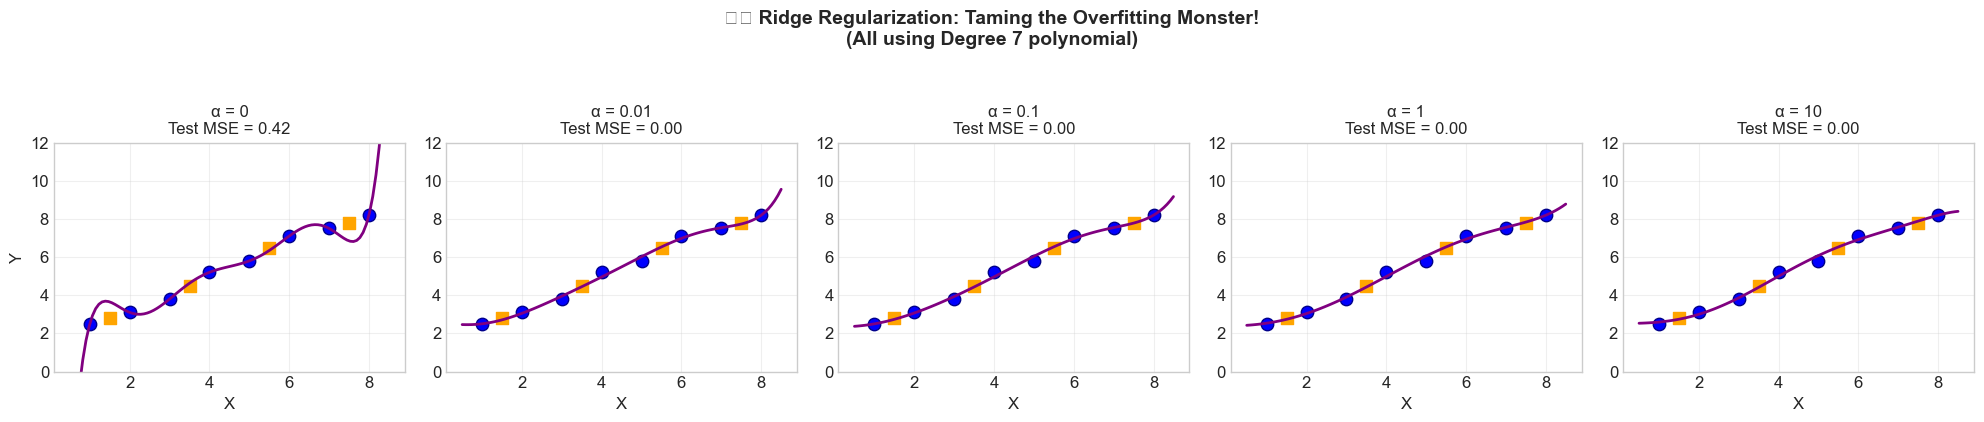


💡 NOTICE:
   • α=0: No regularization → Wild overfitting!
   • α=0.01 to 1: Regularization kicks in → Smoother curves
   • α=10: Too much regularization → Almost a straight line

   The SWEET SPOT is usually somewhere in the middle!


In [16]:
from sklearn.linear_model import Ridge, Lasso

# Let's see how regularization helps with our overfitting example!

# Use a high degree polynomial that would normally overfit
degree = 7
poly = PolynomialFeatures(degree=degree)
X_train_poly = poly.fit_transform(X_train)
X_test_poly = poly.transform(X_test)
X_line_poly = poly.transform(X_line)

# Different regularization strengths
alphas = [0, 0.01, 0.1, 1, 10]

fig, axes = plt.subplots(1, 5, figsize=(20, 4))

for ax, alpha in zip(axes, alphas):
    # Use Ridge regression
    if alpha == 0:
        model = LinearRegression()
    else:
        model = Ridge(alpha=alpha)
    
    model.fit(X_train_poly, y_train)
    y_line = model.predict(X_line_poly)
    
    # Calculate errors
    train_mse = calculate_mse(y_train, model.predict(X_train_poly))
    test_mse = calculate_mse(y_test, model.predict(X_test_poly))
    
    # Plot
    ax.scatter(X_train, y_train, s=80, c='blue', edgecolors='darkblue', label='Train')
    ax.scatter(X_test, y_test, s=80, c='orange', marker='s', label='Test')
    ax.plot(X_line, y_line, 'purple', linewidth=2)
    ax.set_title(f'α = {alpha}\nTest MSE = {test_mse:.2f}', fontsize=12)
    ax.set_ylim(0, 12)
    ax.grid(True, alpha=0.3)
    ax.set_xlabel('X')
    if alpha == 0:
        ax.set_ylabel('Y')

plt.suptitle('🎛️ Ridge Regularization: Taming the Overfitting Monster!\n(All using Degree 7 polynomial)', 
             fontsize=14, fontweight='bold', y=1.05)
plt.tight_layout()
plt.savefig('11_ridge_regularization.png', dpi=150, bbox_inches='tight')
plt.show()

print("\n💡 NOTICE:")
print("   • α=0: No regularization → Wild overfitting!")
print("   • α=0.01 to 1: Regularization kicks in → Smoother curves")
print("   • α=10: Too much regularization → Almost a straight line")
print("\n   The SWEET SPOT is usually somewhere in the middle!")

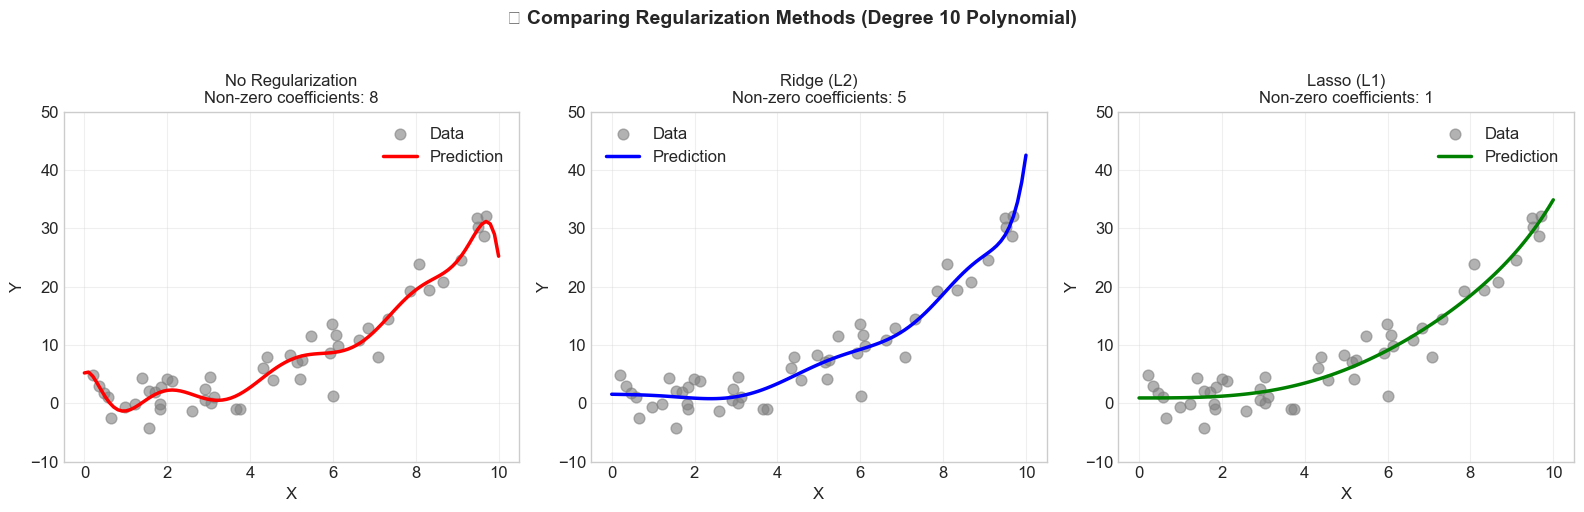

In [17]:
# Let's compare Ridge vs Lasso

# Create more complex data for this demo
np.random.seed(42)
n_samples = 50
X_demo = np.sort(np.random.uniform(0, 10, n_samples)).reshape(-1, 1)
y_demo = 0.5 * X_demo.ravel()**2 - 2*X_demo.ravel() + 3 + np.random.normal(0, 3, n_samples)

# High degree polynomial
degree = 10
poly = PolynomialFeatures(degree=degree)
X_demo_poly = poly.fit_transform(X_demo)

X_line = np.linspace(0, 10, 100).reshape(-1, 1)
X_line_poly = poly.transform(X_line)

fig, axes = plt.subplots(1, 3, figsize=(16, 5))

# No regularization
model_none = LinearRegression()
model_none.fit(X_demo_poly, y_demo)
y_none = model_none.predict(X_line_poly)

# Ridge
model_ridge = Ridge(alpha=10)
model_ridge.fit(X_demo_poly, y_demo)
y_ridge = model_ridge.predict(X_line_poly)

# Lasso
model_lasso = Lasso(alpha=1, max_iter=10000)
model_lasso.fit(X_demo_poly, y_demo)
y_lasso = model_lasso.predict(X_line_poly)

# Plot comparison
models = [
    (y_none, model_none.coef_, 'No Regularization', 'red'),
    (y_ridge, model_ridge.coef_, 'Ridge (L2)', 'blue'),
    (y_lasso, model_lasso.coef_, 'Lasso (L1)', 'green')
]

for ax, (y_pred, coefs, title, color) in zip(axes, models):
    ax.scatter(X_demo, y_demo, s=60, c='gray', alpha=0.6, label='Data')
    ax.plot(X_line, y_pred, color=color, linewidth=2.5, label='Prediction')
    ax.set_xlabel('X', fontsize=12)
    ax.set_ylabel('Y', fontsize=12)
    ax.set_title(f'{title}\nNon-zero coefficients: {np.sum(np.abs(coefs) > 0.01)}', fontsize=12)
    ax.set_ylim(-10, 50)
    ax.legend()
    ax.grid(True, alpha=0.3)

plt.suptitle('🔬 Comparing Regularization Methods (Degree 10 Polynomial)', 
             fontsize=14, fontweight='bold', y=1.02)
plt.tight_layout()
plt.savefig('12_regularization_comparison.png', dpi=150, bbox_inches='tight')
plt.show()

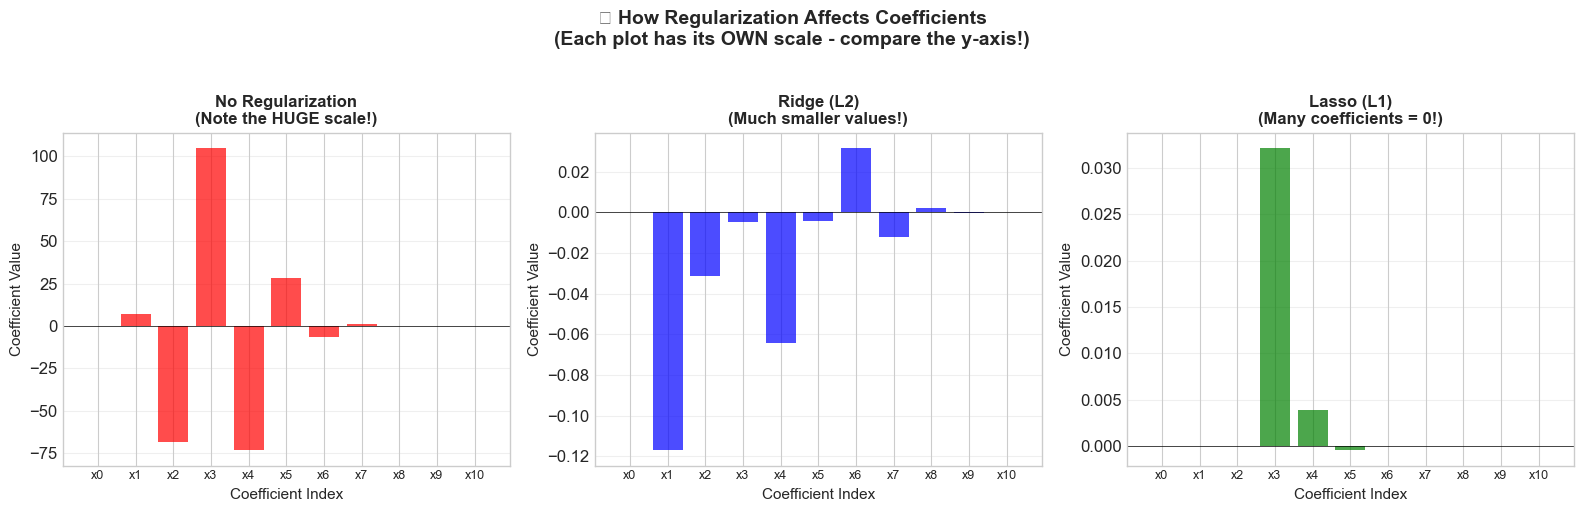


📊 COEFFICIENT ANALYSIS:

   No Regularization: 8 non-zero coefficients
   Ridge (L2):        5 non-zero coefficients (all small)
   Lasso (L1):        1 non-zero coefficients (some eliminated!)

💡 KEY DIFFERENCES:
   • Ridge: Shrinks ALL coefficients but keeps them
   • Lasso: Sets some coefficients to EXACTLY zero (feature selection!)


In [20]:
# Visualize the coefficients (weights) for each method
# Note: Regularized coefficients are MUCH smaller, so we use separate subplots

fig, axes = plt.subplots(1, 3, figsize=(16, 5))

x_pos = np.arange(len(model_none.coef_))

# Get coefficients
coef_none = model_none.coef_
coef_ridge = model_ridge.coef_
coef_lasso = model_lasso.coef_

# Plot 1: No Regularization (can have huge values!)
axes[0].bar(x_pos, coef_none, color='red', alpha=0.7)
axes[0].set_xlabel('Coefficient Index', fontsize=11)
axes[0].set_ylabel('Coefficient Value', fontsize=11)
axes[0].set_title('No Regularization\n(Note the HUGE scale!)', fontsize=12, fontweight='bold')
axes[0].set_xticks(x_pos)
axes[0].set_xticklabels([f'x{i}' for i in range(len(coef_none))], fontsize=9)
axes[0].grid(True, alpha=0.3, axis='y')
axes[0].axhline(y=0, color='black', linewidth=0.5)

# Plot 2: Ridge (L2) - smaller coefficients
axes[1].bar(x_pos, coef_ridge, color='blue', alpha=0.7)
axes[1].set_xlabel('Coefficient Index', fontsize=11)
axes[1].set_ylabel('Coefficient Value', fontsize=11)
axes[1].set_title('Ridge (L2)\n(Much smaller values!)', fontsize=12, fontweight='bold')
axes[1].set_xticks(x_pos)
axes[1].set_xticklabels([f'x{i}' for i in range(len(coef_ridge))], fontsize=9)
axes[1].grid(True, alpha=0.3, axis='y')
axes[1].axhline(y=0, color='black', linewidth=0.5)

# Plot 3: Lasso (L1) - many zeros!
axes[2].bar(x_pos, coef_lasso, color='green', alpha=0.7)
axes[2].set_xlabel('Coefficient Index', fontsize=11)
axes[2].set_ylabel('Coefficient Value', fontsize=11)
axes[2].set_title('Lasso (L1)\n(Many coefficients = 0!)', fontsize=12, fontweight='bold')
axes[2].set_xticks(x_pos)
axes[2].set_xticklabels([f'x{i}' for i in range(len(coef_lasso))], fontsize=9)
axes[2].grid(True, alpha=0.3, axis='y')
axes[2].axhline(y=0, color='black', linewidth=0.5)

plt.suptitle('📊 How Regularization Affects Coefficients\n(Each plot has its OWN scale - compare the y-axis!)', 
             fontsize=14, fontweight='bold', y=1.02)
plt.tight_layout()
plt.savefig('13_coefficient_comparison.png', dpi=150, bbox_inches='tight')
plt.show()

print("\n📊 COEFFICIENT ANALYSIS:")
print(f"\n   No Regularization: {np.sum(np.abs(model_none.coef_) > 0.01)} non-zero coefficients")
print(f"   Ridge (L2):        {np.sum(np.abs(model_ridge.coef_) > 0.01)} non-zero coefficients (all small)")
print(f"   Lasso (L1):        {np.sum(np.abs(model_lasso.coef_) > 0.01)} non-zero coefficients (some eliminated!)")

print("\n💡 KEY DIFFERENCES:")
print("   • Ridge: Shrinks ALL coefficients but keeps them")
print("   • Lasso: Sets some coefficients to EXACTLY zero (feature selection!)")

---

# Part 10: Putting It All Together - Complete Example! 🎉

Let's use everything we learned on a real-world-style example: **Predicting House Prices!**

In [21]:
# Create a realistic house price dataset
np.random.seed(42)
n_houses = 100

# Features
size_sqft = np.random.uniform(500, 3500, n_houses)  # House size in square feet

# Price depends on size (roughly $150 per sqft) plus base cost, with some noise
true_price = 50000 + 150 * size_sqft + np.random.normal(0, 30000, n_houses)
true_price = np.maximum(true_price, 50000)  # Minimum price

# Create dataframe
house_data = pd.DataFrame({
    'Size (sqft)': np.round(size_sqft, 0),
    'Price ($)': np.round(true_price, -3)  # Round to nearest thousand
})

print("🏠 HOUSE PRICE DATASET")
print("=" * 40)
print(house_data.head(10).to_string(index=False))
print(f"\n... and {n_houses - 10} more houses")

🏠 HOUSE PRICE DATASET
 Size (sqft)  Price ($)
      1624.0   296000.0
      3352.0   544000.0
      2696.0   457000.0
      2296.0   335000.0
       968.0   189000.0
       968.0   206000.0
       674.0   195000.0
      3099.0   499000.0
      2303.0   371000.0
      2624.0   429000.0

... and 90 more houses


In [22]:
from sklearn.model_selection import train_test_split

# Split into training and testing sets (80% train, 20% test)
X = size_sqft.reshape(-1, 1)
y = true_price

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(f"📊 Data Split:")
print(f"   Training set: {len(X_train)} houses")
print(f"   Testing set:  {len(X_test)} houses")

📊 Data Split:
   Training set: 80 houses
   Testing set:  20 houses


In [23]:
# Train different models and compare!

# 1. Simple Linear Regression
model_linear = LinearRegression()
model_linear.fit(X_train, y_train)

# 2. Polynomial Regression (degree 2)
poly2 = PolynomialFeatures(degree=2)
X_train_poly2 = poly2.fit_transform(X_train)
X_test_poly2 = poly2.transform(X_test)
model_poly2 = LinearRegression()
model_poly2.fit(X_train_poly2, y_train)

# 3. Ridge Regression (with polynomial features)
poly3 = PolynomialFeatures(degree=3)
X_train_poly3 = poly3.fit_transform(X_train)
X_test_poly3 = poly3.transform(X_test)
model_ridge = Ridge(alpha=1000)  # Strong regularization
model_ridge.fit(X_train_poly3, y_train)

# Evaluate all models
def evaluate_model(name, model, X_tr, X_te, y_tr, y_te):
    train_pred = model.predict(X_tr)
    test_pred = model.predict(X_te)
    train_mse = calculate_mse(y_tr, train_pred)
    test_mse = calculate_mse(y_te, test_pred)
    return train_mse, test_mse

results = [
    ('Linear Regression', *evaluate_model('Linear', model_linear, X_train, X_test, y_train, y_test)),
    ('Polynomial (deg 2)', *evaluate_model('Poly2', model_poly2, X_train_poly2, X_test_poly2, y_train, y_test)),
    ('Ridge + Poly (deg 3)', *evaluate_model('Ridge', model_ridge, X_train_poly3, X_test_poly3, y_train, y_test))
]

print("\n🏆 MODEL COMPARISON:")
print("=" * 60)
print(f"{'Model':<25} {'Train MSE':>15} {'Test MSE':>15}")
print("-" * 60)
for name, train_mse, test_mse in results:
    print(f"{name:<25} {train_mse:>15,.0f} {test_mse:>15,.0f}")


🏆 MODEL COMPARISON:
Model                           Train MSE        Test MSE
------------------------------------------------------------
Linear Regression             762,910,971     588,329,562
Polynomial (deg 2)            733,243,833     572,256,547
Ridge + Poly (deg 3)          726,752,428     577,922,786


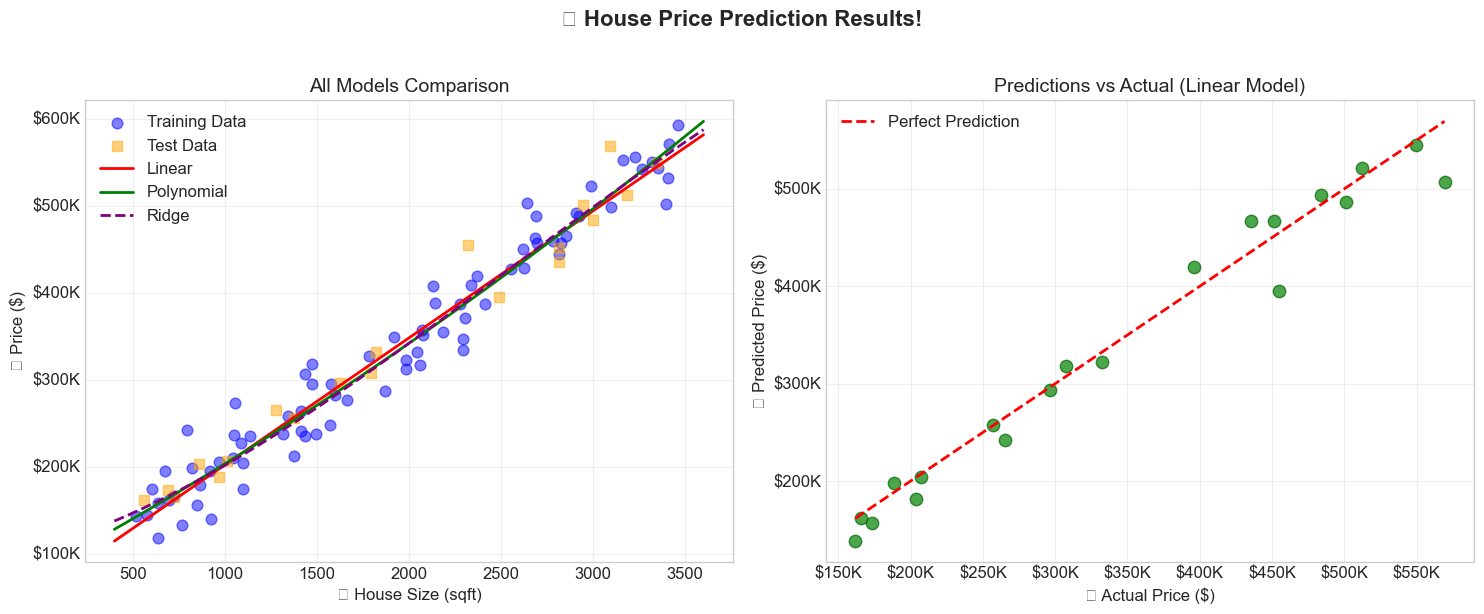


🔮 PREDICTION EXAMPLE:
   A house that is 2000 sqft would cost approximately $348,267


In [24]:
# Final visualization!

fig, axes = plt.subplots(1, 2, figsize=(15, 6))

# Prepare line data
X_line = np.linspace(400, 3600, 100).reshape(-1, 1)

# Left plot: All models comparison
axes[0].scatter(X_train, y_train, s=60, c='blue', alpha=0.5, label='Training Data')
axes[0].scatter(X_test, y_test, s=60, c='orange', alpha=0.5, marker='s', label='Test Data')

# Linear prediction
axes[0].plot(X_line, model_linear.predict(X_line), 'r-', linewidth=2, label='Linear')

# Polynomial prediction
axes[0].plot(X_line, model_poly2.predict(poly2.transform(X_line)), 'g-', linewidth=2, label='Polynomial')

# Ridge prediction
axes[0].plot(X_line, model_ridge.predict(poly3.transform(X_line)), 'purple', linewidth=2, 
             linestyle='--', label='Ridge')

axes[0].set_xlabel('🏠 House Size (sqft)', fontsize=12)
axes[0].set_ylabel('💰 Price ($)', fontsize=12)
axes[0].set_title('All Models Comparison', fontsize=14)
axes[0].legend()
axes[0].grid(True, alpha=0.3)
axes[0].yaxis.set_major_formatter(plt.FuncFormatter(lambda x, p: f'${x/1000:.0f}K'))

# Right plot: Predictions vs Actual
test_pred = model_linear.predict(X_test)
axes[1].scatter(y_test, test_pred, s=80, c='green', alpha=0.7, edgecolors='darkgreen')
axes[1].plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 
             'r--', linewidth=2, label='Perfect Prediction')
axes[1].set_xlabel('💰 Actual Price ($)', fontsize=12)
axes[1].set_ylabel('🔮 Predicted Price ($)', fontsize=12)
axes[1].set_title('Predictions vs Actual (Linear Model)', fontsize=14)
axes[1].legend()
axes[1].grid(True, alpha=0.3)
axes[1].xaxis.set_major_formatter(plt.FuncFormatter(lambda x, p: f'${x/1000:.0f}K'))
axes[1].yaxis.set_major_formatter(plt.FuncFormatter(lambda x, p: f'${x/1000:.0f}K'))

plt.suptitle('🏠 House Price Prediction Results!', fontsize=16, fontweight='bold', y=1.02)
plt.tight_layout()
plt.savefig('14_final_house_price_model.png', dpi=150, bbox_inches='tight')
plt.show()

# Make a prediction!
new_house_size = 2000
predicted_price = model_linear.predict([[new_house_size]])[0]
print(f"\n🔮 PREDICTION EXAMPLE:")
print(f"   A house that is {new_house_size} sqft would cost approximately ${predicted_price:,.0f}")

---

# 🎓 Congratulations! Summary of What You Learned

## Key Concepts Covered:

### 1. **Linear Regression Basics**
- Finding the best line: $\hat{y} = wx + b$
- **w (weight)** controls the slope
- **b (bias)** controls where the line starts

### 2. **Cost Function (MSE)**
- Measures how "wrong" our predictions are
- Lower MSE = Better model!

### 3. **Gradient Descent**
- How computers "learn" by taking steps toward lower error
- **Learning rate** controls step size
- Too small = slow, Too big = unstable

### 4. **Polynomial Regression**
- When data follows curves, not lines
- Higher degree = More complex curves

### 5. **Overfitting**
- When models memorize instead of learn
- Good on training data, bad on new data

### 6. **Regularization**
- **Ridge (L2)**: Shrinks all weights
- **Lasso (L1)**: Removes some features entirely
- Helps prevent overfitting!

---

## 🚀 Next Steps to Continue Learning:

1. **Try different datasets** - Find data online and practice!
2. **Experiment with hyperparameters** - Change learning rates, polynomial degrees, regularization strength
3. **Learn about multiple features** - What if we use both house size AND number of bedrooms?
4. **Explore other algorithms** - Decision trees, neural networks, and more!

---

**Happy Learning! 🎉**

In [25]:
# Quick Reference Card - Save this!

print("""
╔══════════════════════════════════════════════════════════════════════╗
║                    📚 LINEAR REGRESSION CHEAT SHEET                  ║
╠══════════════════════════════════════════════════════════════════════╣
║                                                                      ║
║  THE EQUATION:  ŷ = w·x + b                                          ║
║                                                                      ║
║  COST FUNCTION: MSE = (1/n) Σ(actual - predicted)²                   ║
║                                                                      ║
║  GRADIENT DESCENT:                                                   ║
║     w_new = w_old - α · (∂MSE/∂w)                                    ║
║     b_new = b_old - α · (∂MSE/∂b)                                    ║
║                                                                      ║
║  LEARNING RATE (α):                                                  ║
║     Too small → Slow learning                                        ║
║     Too big   → Unstable/overshooting                                ║
║     Just right → Fast & stable                                       ║
║                                                                      ║
║  POLYNOMIAL REGRESSION:                                              ║
║     Degree 1 → Line                                                  ║
║     Degree 2 → Parabola                                              ║
║     Degree n → Complex curve                                         ║
║                                                                      ║
║  REGULARIZATION:                                                     ║
║     Ridge (L2) → Shrinks weights                                     ║
║     Lasso (L1) → Removes features                                    ║
║                                                                      ║
║  GOLDEN RULES:                                                       ║
║     ✓ Start simple, add complexity if needed                         ║
║     ✓ Always check performance on TEST data                          ║
║     ✓ Use regularization to prevent overfitting                      ║
║     ✓ Visualize your data and predictions!                           ║
║                                                                      ║
╚══════════════════════════════════════════════════════════════════════╝
""")


╔══════════════════════════════════════════════════════════════════════╗
║                    📚 LINEAR REGRESSION CHEAT SHEET                  ║
╠══════════════════════════════════════════════════════════════════════╣
║                                                                      ║
║  THE EQUATION:  ŷ = w·x + b                                          ║
║                                                                      ║
║  COST FUNCTION: MSE = (1/n) Σ(actual - predicted)²                   ║
║                                                                      ║
║  GRADIENT DESCENT:                                                   ║
║     w_new = w_old - α · (∂MSE/∂w)                                    ║
║     b_new = b_old - α · (∂MSE/∂b)                                    ║
║                                                                      ║
║  LEARNING RATE (α):                                                  ║
║     Too small → Slow learning                    